# CÂU HỎI 1:
**Đâu là top 5 thành phố, đất nước có mật độ ô nhiễm cao nhất, thấp nhất trong 5 năm 2017 - 2021? Với mỗi thành phố cao nhất, thấp nhất trong năm 2021 mật độ ô nhiễm biến đổi như thế nào theo các tháng? Thử giải thích**

**Ý nghĩa của việc đặt ra câu hỏi này**: Nhằm xác định được những thành phố nào đã đạt được mức độ ô nhiễm đáng báo động vô cùng trong những năm vừa qua, cũng như những quốc gia đã giữ được sự trong sạch của không khí. Thông qua đó có thể biểu diễn được cụ thể quá trình biến đổi chất lượng không khí trong suốt 12 tháng của năm gần đây nhất, để xem thử có sự biến động nào đặc biệt xảy ra đối với 2 thành phố cao nhất và thấp nhất không.

In [3]:
#import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Đọc file csv `../data/airdata6years.csv` và lưu vào biến `df`

In [4]:
path = '../data/airdata6years.csv'
df = pd.read_csv(path)
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Rank,City,Country,Year_2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year_2020,Year_2019,Year_2018,Year_2017
0,1,Bhiwadi,India,106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,Ghaziabad,India,102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163.0,106.6,110.2,135.2,144.6
2,3,Hotan,China,101.5,NaN,NaN,158.0,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116.0,91.9
3,4,Delhi,India,96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,Jaunpur,India,95.3,182.2,143.5,91.0,70.0,51.1,40.7,33.5,34.2,36.8,75.7,196.0,195.7,NaN,NaN,NaN,NaN


Đưa ra bảng thống kê và vẽ biểu đồ thể hiện biến động

## 1. Thống kê thành phố có tỷ lệ ô nhiễm cao nhất, thấp nhất

Vì mỗi cột số liệu đều chứa giá trị nan nên sẽ thực hiện thay các giá trị này bằng trung vị (median) ở cell bên dưới. Do số lượng giá trị nan tương đối nhiều nên việc thay bằng giá trị median có tính hợp lý hơn là 0 hoặc mean vì sẽ ảnh hưởng tới dữ liệu

In [5]:
#Liệt kê những cột kiểu dữ liệu số trong df
numberic_cols = ['Year_2021', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
                'Year_2020', 'Year_2019', 'Year_2018', 'Year_2017']

#Lặp những cột số để thay đổi nan bằng median
for i in numberic_cols:
    med = df[i].median() #giá trị median của mỗi cột
    df[i] = df[i].fillna(med)

*Định nghĩa hàm tìm cần thiết:*

In [6]:
#Hàm tìm top 5 giá trị lớn nhất của cột bất kỳ
def findMax5(df, year, column):
    year_col = f'Year_{year}'
    index = df[year_col].sort_values(ascending = False)[:5].index #Vị trí 5 giá trị cao nhất
    res = df[column].loc[index].values #5 dòng cao nhất    
    #Danh sách để trả về series, gồm năm và 5 dòng của cột tương ứng
    lst = np.insert(res, 0, year)

    return pd.Series(lst)

#Hàm tìm top 5 giá trị nhỏ nhất của cột bất kỳ 
def findMin5(df, year, column):
    year_col = f'Year_{year}'
    index = df[year_col].sort_values(ascending = True)[:5].index #Vị trí 5 giá trị nhỏ nhất
    res = df[column].loc[index].values #5 dòng nhỏ nhất
    #Danh sách để trả về series, gồm năm và 5 dòng của cột tương ứng
    lst = np.insert(res, 0, year)
    
    return pd.Series(lst)

*Lập 2 bảng thống kê:*

In [7]:
#Danh sách các năm
years = [2017, 2018, 2019, 2020, 2021]
years = np.array(years)

#Danh sách các series để tạo thành bảng 
lst_min_city = []
lst_max_city = []

### Min
for i in years: #Lặp qua từng năm
    lst_min_city.append(findMin5(df, i, 'City'))

#Tạo min_city_df và đổi tên cột
min_city_df = pd.DataFrame(lst_min_city)
min_city_df = min_city_df.rename(columns = {0 : 'Year', 1 : 'Top 1', 2 : 'Top 2', 3 : 'Top 3', 4 : 'Top 4', 5 : 'Top 5'})
min_city_df =min_city_df.set_index('Year')

print('TOP 5 MIN CITY')
print(min_city_df)


TOP 5 MIN CITY
            Top 1         Top 2      Top 3        Top 4        Top 5
Year                                                                
2017    Bredkalen       Judbury  Emu River  Bream Creak       Exeter
2018      Judbury     Emu River  St Helens   Oak Harbor   Mornington
2019  Kailua-Kona  Captain Cook     Waimea    St Helens    Emu River
2020       Waimea       Judbury  St Helens    Emu River  Kailua-Kona
2021          Chu     St Helens    Judbury    Emu River   Mornington


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13984\2886315149.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  index = df[year_col].sort_values(ascending = True)[:5].index #Vị trí 5 giá trị nhỏ nhất


In [8]:
### Max
for i in years: #Lặp qua từng năm
    lst_max_city.append(findMax5(df, i, 'City'))

#Tạo mmin_df và đổi tên cột
max_city_df = pd.DataFrame(lst_max_city)
max_city_df = max_city_df.rename(columns = {0 : 'Year', 1 : 'Top 1', 2 : 'Top 2', 3 : 'Top 3', 4 : 'Top 4', 5 : 'Top 5'})
max_city_df = max_city_df.set_index('Year')

print('TOP 5 MAX CITY')
print(max_city_df)

TOP 5 MAX CITY
          Top 1      Top 2        Top 3      Top 4    Top 5
Year                                                       
2017   Gurugram  Ghaziabad        Noida     Lahore     Jind
2018   Gurugram  Ghaziabad   Faisalabad  Faridabad  Bhiwadi
2019  Ghaziabad      Hotan   Faisalabad      Delhi    Noida
2020      Hotan  Ghaziabad  Bulandshahr    Bhiwadi    Noida
2021    Bhiwadi  Ghaziabad        Hotan      Delhi  Jaunpur


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13984\2886315149.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  index = df[year_col].sort_values(ascending = False)[:5].index #Vị trí 5 giá trị cao nhất


Dựa vào bảng trên ta có thể thấy  vào năm 2021 Bhiwadi là thành phố ô nhiễm nhất và Chu là thành phố ít ô nhiễm nhất. Vì vậy ta sẽ lần lượt vẽ biểu đồ đường qua các tháng để thể hiện sự biến động ô nhiễm theo thời gian của 2 thành phố này.

***Vẽ biểu đồ đường thể hiện sự biến đổi ở Bhiwadi, Chu***

*Ta sử dụng biểu đồ đường để thể hiện vì đây là biểu đồ trực quan tốt nhất cho được sự tăng giảm giá trị trên một khoảng thời gian nào đó, giúp người nhìn có thể nắm rõ được sự biến đổi đó hơn khi so với các loại biểu đồ khác*

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13984\749600880.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


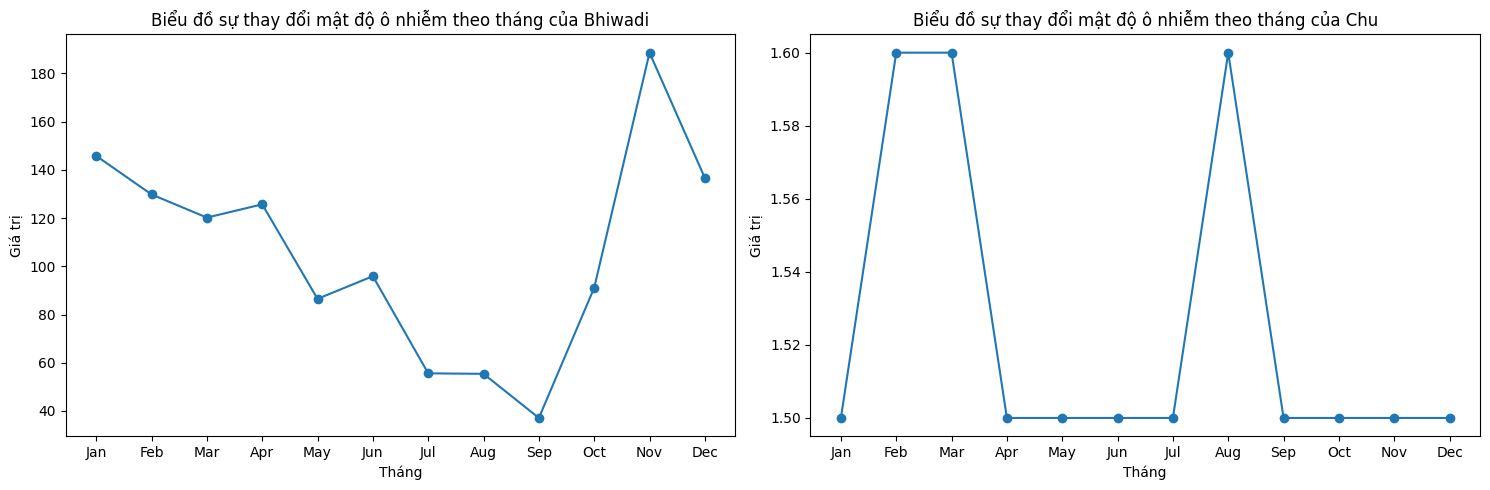

In [9]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] #Các tháng

plt.subplots(figsize=(15, 5))

# Bhiwadi
values1 = df.loc[df['City'] == 'Bhiwadi'][months].values[0] #Giá trị ứng với mỗi tháng

#Vẽ biểu đồ đường
plt.subplot(1, 2, 1)
plt.plot(months, values1, marker = 'o')

#Customize chart
plt.title('Biểu đồ sự thay đổi mật độ ô nhiễm theo tháng của Bhiwadi')
plt.xlabel('Tháng', fontsize = 10)
plt.ylabel('Giá trị',fontsize = 10)

# Chu
values2 = df.loc[df['City'] == 'Chu'][months].values[0] #Giá trị ứng với mỗi tháng

#Vẽ biểu đồ đường
plt.subplot(1, 2, 2)
plt.plot(months, values2, marker = 'o')

#Customize chart
plt.title('Biểu đồ sự thay đổi mật độ ô nhiễm theo tháng của Chu')
plt.xlabel('Tháng', fontsize = 10)
plt.ylabel('Giá trị',fontsize = 10)

plt.tight_layout()
plt.show()

**NHẬN XÉT**
- 2 biểu đồ trên ở cột giá trị đã cho thấy sự chênh lệch rất nhiều giữa 2 khoảng độ đo giá trị ô nhiễm giữa thành phố ô nhiễm nhất và sạch nhất.
- Chu có giá trị ô nhiễm tăng vào tháng 2, 3 và 8 nhưng giá trị tăng không đáng kể (0.1) nên chúng ta có thể bỏ qua việc giải thích biến động.
- Bhiwadi có sự biến đổi giá trị ô nhiễm tăng mạnh vào tháng 11 so với tháng khác trong năm nên ở đây có thể thử giải thích tại sao có sự biến động này.

**GIẢI THÍCH** 

Theo như sự tìm hiểu, vào tháng 11 ở Ấn độ (India) thường có nhiều lễ hội và ngày lễ được diễn ra, chính vì thế có khả năng trong những ngày lễ này các hoạt động phong tục truyền thống được tổ chức đã có những hoạt động làm hàm lượng nhiều loại chất khí gây hại cho môi trường từ đó làm giảm đi chất lượng không khí sạch, tăng chỉ số ô nhiễm lên một cách nhanh chóng.

## 2. Thống kê đất nước có tỷ lệ ô nhiễm cao nhất, thấp nhất

Trước hết hãy phải đưa df được groupby bởi Country và tính mean của mỗi country

In [10]:
country_df = df.groupby('Country').mean()
country_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13984\1980252517.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_df = df.groupby('Country').mean()


,Rank,Year_2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year_2020,Year_2019,Year_2018,Year_2017
Country,,,,,,,,,,,,,,,,,,
Afghanistan,264.000000,37.500000,101.900000,64.800000,41.900000,21.300000,16.100000,21.100000,28.300000,23.600000,13.900000,12.100000,47.400000,101.400000,46.500000,58.800000,61.800000,11.900000
Albania,2412.000000,12.500000,13.200000,19.100000,16.100000,10.600000,8.600000,11.100000,10.900000,11.800000,11.400000,9.600000,13.500000,14.700000,16.000000,10.600000,12.000000,11.900000
Algeria,1091.000000,20.000000,16.200000,25.300000,30.000000,19.300000,18.000000,19.800000,20.900000,21.900000,22.600000,16.700000,10.500000,19.900000,20.200000,21.200000,12.000000,11.900000
Andorra,5412.000000,7.300000,9.000000,6.600000,8.200000,6.100000,4.400000,7.300000,10.600000,8.400000,7.500000,6.200000,5.100000,6.400000,7.400000,10.600000,12.000000,11.900000
Angola,3037.000000,11.000000,11.600000,13.700000,13.700000,7.000000,9.000000,10.900000,11.400000,16.500000,11.900000,10.100000,9.100000,8.100000,13.000000,15.900000,12.000000,11.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,323.000000,35.350000,25.050000,27.650000,26.850000,32.500000,37.450000,43.600000,49.400000,45.750000,41.500000,28.550000,31.050000,23.800000,28.250000,39.650000,52.050000,11.900000
United Kingdom,4660.419355,8.294194,9.403226,9.177419,11.112903,9.439355,6.915484,7.787742,8.601290,5.990968,9.537419,6.345161,7.612903,8.130323,8.476129,9.626452,11.354839,11.222581
Uruguay,1905.000000,14.200000,11.350000,7.500000,9.700000,10.400000,18.000000,19.000000,27.600000,20.800000,8.300000,8.400000,10.800000,7.000000,10.300000,10.600000,12.000000,11.900000


Dựa trên country_df ở trên ta có thể thấy cột Rank hiện tại không còn tác dụng nên ta sẽ bỏ cột này. Đồng thời ta cần làm tròn số liệu lên chữ số thập phân số 2 cho đồng bộ với kiểu dữ liệu ban đầu

In [11]:
country_df = country_df.round(2).drop('Rank', axis = 1)
country_df.reset_index(inplace = True)
country_df

,Country,Year_2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year_2020,Year_2019,Year_2018,Year_2017
0,Afghanistan,37.50,101.90,64.80,41.90,21.30,16.10,21.10,28.30,23.60,13.90,12.10,47.40,101.40,46.50,58.80,61.80,11.90
1,Albania,12.50,13.20,19.10,16.10,10.60,8.60,11.10,10.90,11.80,11.40,9.60,13.50,14.70,16.00,10.60,12.00,11.90
2,Algeria,20.00,16.20,25.30,30.00,19.30,18.00,19.80,20.90,21.90,22.60,16.70,10.50,19.90,20.20,21.20,12.00,11.90
3,Andorra,7.30,9.00,6.60,8.20,6.10,4.40,7.30,10.60,8.40,7.50,6.20,5.10,6.40,7.40,10.60,12.00,11.90
4,Angola,11.00,11.60,13.70,13.70,7.00,9.00,10.90,11.40,16.50,11.90,10.10,9.10,8.10,13.00,15.90,12.00,11.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,United Arab Emirates,35.35,25.05,27.65,26.85,32.50,37.45,43.60,49.40,45.75,41.50,28.55,31.05,23.80,28.25,39.65,52.05,11.90
114,United Kingdom,8.29,9.40,9.18,11.11,9.44,6.92,7.79,8.60,5.99,9.54,6.35,7.61,8.13,8.48,9.63,11.35,11.22
115,Uruguay,14.20,11.35,7.50,9.70,10.40,18.00,19.00,27.60,20.80,8.30,8.40,10.80,7.00,10.30,10.60,12.00,11.90
116,Uzbekistan,42.80,55.20,38.10,33.90,30.20,26.10,28.90,36.90,34.90,31.90,45.80,95.90,59.00,29.90,41.20,34.30,11.90


Chúng ta sẽ tận dụng 2 hàm Min5 Max5 ở trên và thay đổi đối số là Country. Từ đó tìm ra được 5 đất nước ô nhiễm nhất và trong sạch nhất:

In [12]:
#Danh sách các series để tạo thành bảng 
lst_min_country = []
lst_max_country = []

### Min
for i in years: #Lặp qua từng năm
    lst_min_country.append(findMin5(country_df, i, 'Country'))

#Tạo min_country_df và đổi tên cột
min_country_df = pd.DataFrame(lst_min_country)
min_country_df = min_country_df.rename(columns = {0 : 'Year', 1 : 'Top 1', 2 : 'Top 2', 3 : 'Top 3', 4 : 'Top 4', 5 : 'Top 5'})
min_country_df = min_country_df.set_index('Year')

print('TOP 5 MIN COUNTRY')
print(min_country_df)

TOP 5 MIN COUNTRY
                    Top 1                Top 2        Top 3      Top 4  \
Year                                                                     
2017              Estonia              Finland      Iceland  Australia   
2018              Iceland              Estonia      Finland  Australia   
2019  U.S. Virgin Islands              Iceland      Estonia    Finland   
2020  U.S. Virgin Islands        New Caledonia      Estonia    Finland   
2021        New Caledonia  U.S. Virgin Islands  Puerto Rico    Bahamas   

         Top 5  
Year            
2017    Norway  
2018  Portugal  
2019   Bahamas  
2020   Ecuador  
2021   Bonaire  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13984\2886315149.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  index = df[year_col].sort_values(ascending = True)[:5].index #Vị trí 5 giá trị nhỏ nhất


In [13]:
### Max
for i in years: #Lặp qua từng năm
    lst_max_country.append(findMax5(country_df, i, 'Country'))

#Tạo max_country_df và đổi tên cột
max_country_df = pd.DataFrame(lst_max_country)
max_country_df = max_country_df.rename(columns = {0 : 'Year', 1 : 'Top 1', 2 : 'Top 2', 3 : 'Top 3', 4 : 'Top 4', 5 : 'Top 5'})
max_country_df = max_country_df.set_index('Year')

print('TOP 5 MAX COUNTRY')
print(max_country_df)

TOP 5 MAX COUNTRY
            Top 1       Top 2                 Top 3       Top 4  \
Year                                                              
2017      Bahrain      Uganda                 China    Pakistan   
2018  Afghanistan     Bahrain  United Arab Emirates    Pakistan   
2019  Afghanistan    Pakistan               Bahrain  Uzbekistan   
2020     Pakistan  Bangladesh           Afghanistan       Qatar   
2021     Pakistan  Tajikistan            Kyrgyzstan        Oman   

                     Top 5  
Year                        
2017                Kuwait  
2018                Uganda  
2019  United Arab Emirates  
2020                 India  
2021                 India  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13984\2886315149.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  index = df[year_col].sort_values(ascending = False)[:5].index #Vị trí 5 giá trị cao nhất
